In [165]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [166]:
df = pd.read_csv('TrainD.csv', header=None, delimiter = "#EOF")

<ipython-input-166-7227cebc79c7>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('TrainD.csv', header=None, delimiter = "#EOF")


In [167]:
df

,0,1
0,+1\tOne of my all-time favorite so-laughably-l...,NaN
1,"-1\tI had high hopes for this film, because I ...",NaN
2,"-1\tWhen this was released, I thought this was...",NaN
3,-1\tI just watched this movie on Starz. Let me...,NaN
4,+1\tI loved it so much that I bought the DVD a...,NaN
...,...,...
24995,+1\tIt was a doubly interesting experience. Fo...,NaN
24996,-1\tWow what a great premise for a film : Set ...,NaN
24997,-1\tA lot of death happens in the wild. You do...,NaN
24998,+1\tCorean cinema can be quite surprising for ...,NaN


In [168]:
df1=pd.DataFrame(df, columns=[0])

In [169]:
df1

,0
0,+1\tOne of my all-time favorite so-laughably-l...
1,"-1\tI had high hopes for this film, because I ..."
2,"-1\tWhen this was released, I thought this was..."
3,-1\tI just watched this movie on Starz. Let me...
4,+1\tI loved it so much that I bought the DVD a...
...,...
24995,+1\tIt was a doubly interesting experience. Fo...
24996,-1\tWow what a great premise for a film : Set ...
24997,-1\tA lot of death happens in the wild. You do...
24998,+1\tCorean cinema can be quite surprising for ...


In [170]:
train = df1[0].str.split('\t',n=1,expand = True)

In [171]:
train

,0,1
0,+1,One of my all-time favorite so-laughably-lousy...
1,-1,"I had high hopes for this film, because I thou..."
2,-1,"When this was released, I thought this was one..."
3,-1,I just watched this movie on Starz. Let me go ...
4,+1,I loved it so much that I bought the DVD and t...
...,...,...
24995,+1,It was a doubly interesting experience. For so...
24996,-1,Wow what a great premise for a film : Set it a...
24997,-1,A lot of death happens in the wild. You don't ...
24998,+1,Corean cinema can be quite surprising for an o...


In [172]:
train = train.rename(columns={0:"Rating",1:'Review'})

In [173]:
train

,Rating,Review
0,+1,One of my all-time favorite so-laughably-lousy...
1,-1,"I had high hopes for this film, because I thou..."
2,-1,"When this was released, I thought this was one..."
3,-1,I just watched this movie on Starz. Let me go ...
4,+1,I loved it so much that I bought the DVD and t...
...,...,...
24995,+1,It was a doubly interesting experience. For so...
24996,-1,Wow what a great premise for a film : Set it a...
24997,-1,A lot of death happens in the wild. You don't ...
24998,+1,Corean cinema can be quite surprising for an o...


In [174]:
train.dtypes

Rating    object
Review    object
dtype: object

In [175]:
train['Rating']=train['Rating'].astype(int)

In [176]:
train.dtypes

Rating     int32
Review    object
dtype: object

In [177]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,25000):
  reviews = re.sub('[^a-zA-Z]',' ',train['Review'][i])
  reviews = reviews.lower()
  reviews = reviews.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  reviews = [ps.stem(word) for word in reviews if not word in set(all_stopwords)]
  reviews = ' '.join(reviews)
  corpus.append(reviews)
 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Parag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [178]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(corpus)
y = train.iloc[:, 0].values

In [179]:
X

<25000x49642 sparse matrix of type '<class 'numpy.float64'>'
	with 2376926 stored elements in Compressed Sparse Row format>

In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [181]:
print(X_test)

  (0, 46711)	0.28791752213131405
  (0, 30335)	0.2380419231192444
  (0, 41240)	0.20442106816446326
  (0, 21382)	0.353555831483888
  (0, 13481)	0.20150293005976355
  (0, 5566)	0.19332604498863795
  (0, 40786)	0.13507064901291568
  (0, 6473)	0.20722792245280716
  (0, 3365)	0.1873277695317628
  (0, 42061)	0.13727689155832257
  (0, 22332)	0.16144740358275536
  (0, 13884)	0.18625867490974013
  (0, 48115)	0.12308945935254166
  (0, 4404)	0.11486533778815246
  (0, 47785)	0.14283416619227696
  (0, 15779)	0.13617371707289924
  (0, 17829)	0.0716023533527473
  (0, 2293)	0.11934743986618154
  (0, 25472)	0.06916810547888398
  (0, 31226)	0.09630020774398704
  (0, 47063)	0.11115481828497818
  (0, 20205)	0.10939933873378951
  (0, 1729)	0.10197735920496671
  (0, 28961)	0.04331165781666401
  (0, 47685)	0.060531949312393744
  :	:
  (4999, 38611)	0.17431012150518507
  (4999, 21405)	0.08721870885167925
  (4999, 17797)	0.14260959487346794
  (4999, 21638)	0.1539773347740872
  (4999, 12962)	0.15540051190420806


In [182]:
test_r = cv.inverse_transform(X_test)

In [183]:
test_r = np.array(test_r)

In [184]:
test_r

array([array(['varney', 'noon', 'stark', 'insist', 'engross', 'broad', 'spend',
       'cap', 'basebal', 'suffer', 'jim', 'etern', 'white', 'black',
       'wear', 'four', 'great', 'ask', 'look', 'origin', 'viewer', 'hour',
       'anyon', 'movi', 'watch', 'made', 'would', 'think', 'color',
       'high', 'dopey', 'make', 'robert', 'br', 'like', 'bill', 'one'],
      dtype='<U51'),
       array(['sous', 'dehaven', 'blane', 'steamer', 'gleason', 'maxwel',
       'chilli', 'inebri', 'mccoy', 'mayer', 'garland', 'andi', 'gloria',
       'marilyn', 'rebellion', 'radic', 'deservedli', 'roar', 'mickey',
       'uncl', 'stanley', 'wilder', 'hardi', 'sid', 'loui', 'holiday',
       'ah', 'rooney', 'judi', 'warren', 'coincid', 'crowd', 'jacki',
       'award', 'broadway', 'taylor', 'fade', 'code', 'teenag', 'none',
       'adapt', 'spirit', 'emphasi', 'morgan', 'youth', 'huston',
       'walter', 'autumn', 'ii', 'summer', 'educ', 'central', 'forgotten',
       'killer', 'version', 'law', 'music

In [185]:
y_train.shape

(20000,)

In [186]:
from sklearn.metrics.pairwise import linear_kernel

In [187]:
def kNN(k, testTfidf, trainTfidf, test_r, train_label, weight=True):
    test_y = []    
    for index, line in enumerate(test_r):
        cos_sim = linear_kernel(testTfidf[index:index+1], trainTfidf).flatten()
        if weight == True:
            nghbr_ind = cos_sim.argsort()[:-k:-1]
            similarities = cos_sim[nghbr_ind]
            labels_list = train_label[nghbr_ind].tolist()
            my_list = []            
            for s, l in zip(similarities, labels_list):
                if l == -1:
                    my_list.append(-s)
                else:
                    my_list.append(s)   
                    
            label_sum = sum(my_list)
            if label_sum > 0:
                test_y.append("+1")
            else:
                test_y.append(-1)

        else:
            nghbr_ind = cos_sim.argsort()[:-k:-1]
            labels_list = train_label[nghbr_ind].tolist()
            label_sum = sum(labels_list)

            if label_sum > 0:
                test_y.append("+1")
            else:
                test_y.append(-1)
                
        print(index)
            
    return pd.DataFrame(test_y)   

In [201]:
k=[]

for i in range(30,40) :
    if (i%2 != 0):
        k.append(i)

In [202]:
k

[31, 33, 35, 37, 39]

In [203]:
from sklearn.metrics import f1_score
scores = []
for i in k :
    prediction = kNN(k=i, testTfidf=X_test, trainTfidf=X_train, test_r=test_r, train_label=y_train, weight=True)
    y_pred = prediction.to_numpy()
    y_pred = y_pred.astype(int)
    a = f1_score(y_test, y_pred, average='micro')
    scores.append(a)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [204]:
scores

[0.8002000000000001, 0.7968, 0.7984, 0.8002000000000001, 0.801]

In [205]:
K_values = pd.DataFrame(columns = ['K', 'Accuracy_Score'])


In [206]:
K_values['K'] = k

In [207]:
K_values['Accuracy_Score'] = scores

In [208]:
K_values

,K,Accuracy_Score
0,31,0.8002
1,33,0.7968
2,35,0.7984
3,37,0.8002
4,39,0.8010


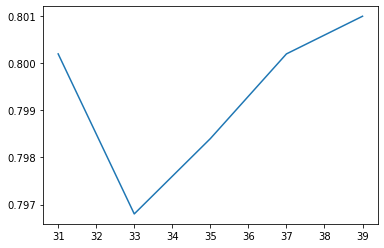

In [215]:
plt.plot(K_values['K'], K_values['Accuracy_Score'])

In [210]:
prediction = kNN(k=39, testTfidf=X_test, trainTfidf=X_train, test_r=test_r, train_label=y_train, weight=True)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [216]:
print(prediction)

       0
0     -1
1     +1
2     +1
3     -1
4     +1
...   ..
4995  +1
4996  -1
4997  +1
4998  +1
4999  +1

[5000 rows x 1 columns]


In [217]:
y_pred = prediction.to_numpy()

In [218]:
y_pred = y_pred.astype(int)

In [219]:
y_test

array([-1, -1,  1, ..., -1,  1,  1])

In [220]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1994  497]
 [ 498 2011]]


In [221]:
df2 = pd.read_csv('TestD.csv', header=None, delimiter = "#EOF")

<ipython-input-221-c779d851e47a>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df2 = pd.read_csv('TestD.csv', header=None, delimiter = "#EOF")


In [222]:
df2

,0,1
0,"This is a very low budget film, set in one loc...",NaN
1,One minute into THE UNTOLD and it`s already ri...,NaN
2,I recently purchased this on DVD as I hadn't h...,NaN
3,Some people have the ability to use only 3 neu...,NaN
4,"As I've said in the title of this review, It p...",NaN
...,...,...
24995,This movie looked like the out-takes of the de...,NaN
24996,This is one of my three all-time favorite movi...,NaN
24997,Most families will recognise similarities betw...,NaN
24998,I stumbled upon this movie by accident. I mean...,NaN


In [223]:
df2=pd.DataFrame(df2, columns=[0])

In [224]:
df2

,0
0,"This is a very low budget film, set in one loc..."
1,One minute into THE UNTOLD and it`s already ri...
2,I recently purchased this on DVD as I hadn't h...
3,Some people have the ability to use only 3 neu...
4,"As I've said in the title of this review, It p..."
...,...
24995,This movie looked like the out-takes of the de...
24996,This is one of my three all-time favorite movi...
24997,Most families will recognise similarities betw...
24998,I stumbled upon this movie by accident. I mean...


In [225]:
test = df2.rename(columns={0:"Review"})

In [226]:
test

,Review
0,"This is a very low budget film, set in one loc..."
1,One minute into THE UNTOLD and it`s already ri...
2,I recently purchased this on DVD as I hadn't h...
3,Some people have the ability to use only 3 neu...
4,"As I've said in the title of this review, It p..."
...,...
24995,This movie looked like the out-takes of the de...
24996,This is one of my three all-time favorite movi...
24997,Most families will recognise similarities betw...
24998,I stumbled upon this movie by accident. I mean...


In [227]:
corpus1 = []
for i in range(0,25000):
  reviews = re.sub('[^a-zA-Z]',' ',test['Review'][i])
  reviews = reviews.lower()
  reviews = reviews.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  reviews = [ps.stem(word) for word in reviews if not word in set(all_stopwords)]
  reviews = ' '.join(reviews)
  corpus1.append(reviews)

In [228]:
X1 = cv.transform(corpus1)

In [230]:
test_r1 = cv.inverse_transform(X1)

In [231]:
test_r1

[array(['would', 'worth', 'women', 'well', 'way', 'watch', 'visitor',
        'valley', 'tough', 'told', 'take', 'subject', 'studio', 'simplic',
        'show', 'shot', 'shield', 'set', 'see', 'say', 'radiat', 'other',
        'one', 'older', 'nuclear', 'not', 'near', 'murder', 'movi', 'man',
        'make', 'made', 'low', 'locat', 'interest', 'interact', 'ie',
        'human', 'hous', 'hollywood', 'hill', 'harvey', 'handsom', 'gun',
        'go', 'get', 'gal', 'first', 'film', 'expens', 'exit', 'entiti',
        'enter', 'effect', 'drifter', 'drift', 'donkey', 'daughter',
        'curtain', 'coupl', 'children', 'certain', 'cast', 'buy', 'budget',
        'br', 'blast', 'bath', 'backdrop', 'away', 'avoid', 'affect', 'ad',
        'actor'], dtype='<U51'),
 array(['year', 'ye', 'wrong', 'worst', 'wors', 'witch', 'whole', 'well',
        'untold', 'unfortun', 'type', 'twenti', 'tvm', 'tri', 'tree',
        'togeth', 'time', 'think', 'thing', 'ten', 'techniqu', 'swindl',
        'sure', 's

In [232]:
test_r1 = np.array(test_r1)

In [233]:
test_r1

array([array(['would', 'worth', 'women', 'well', 'way', 'watch', 'visitor',
       'valley', 'tough', 'told', 'take', 'subject', 'studio', 'simplic',
       'show', 'shot', 'shield', 'set', 'see', 'say', 'radiat', 'other',
       'one', 'older', 'nuclear', 'not', 'near', 'murder', 'movi', 'man',
       'make', 'made', 'low', 'locat', 'interest', 'interact', 'ie',
       'human', 'hous', 'hollywood', 'hill', 'harvey', 'handsom', 'gun',
       'go', 'get', 'gal', 'first', 'film', 'expens', 'exit', 'entiti',
       'enter', 'effect', 'drifter', 'drift', 'donkey', 'daughter',
       'curtain', 'coupl', 'children', 'certain', 'cast', 'buy', 'budget',
       'br', 'blast', 'bath', 'backdrop', 'away', 'avoid', 'affect', 'ad',
       'actor'], dtype='<U51'),
       array(['year', 'ye', 'wrong', 'worst', 'wors', 'witch', 'whole', 'well',
       'untold', 'unfortun', 'type', 'twenti', 'tvm', 'tri', 'tree',
       'togeth', 'time', 'think', 'thing', 'ten', 'techniqu', 'swindl',
       'sure', 'st

In [236]:
result = kNN(k=39, testTfidf=X1, trainTfidf=X, test_r = test_r1, train_label=y, weight=True)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [237]:
np.savetxt('result2.dat', result.values, fmt='%s')